In [4]:
import xarray as xr
import numpy  as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dir_in = "/raid52/yycheng/MPAS/TP_60-3km/pre_daily/mask_res/"
ds_obs_2012 = xr.open_dataset(dir_in + "mask_CN05.1_2012_07.nc")
ds_obs_2015 = xr.open_dataset(dir_in + "mask_CN05.1_2015_07.nc")

ds_reinit_2012 = xr.open_dataset(dir_in + "mask_pre_daily_2012_reinit.nc")
ds_reinit_2015 = xr.open_dataset(dir_in + "mask_pre_daily_2015_reinit.nc")

ds_run_2012 = xr.open_dataset(dir_in + "mask_pre_daily_2012_run.nc")
ds_run_2015 = xr.open_dataset(dir_in + "mask_pre_daily_2015_run.nc")

In [6]:
ts_obs_2012 = ds_obs_2012['pre'].mean(['lat','lon'])
ts_obs_2015 = ds_obs_2015['pre'].mean(['lat','lon'])

ts_run_2012 = ds_run_2012['precip_MPAS'].mean(['latitude', 'longitude'])
ts_run_2015 = ds_run_2015['precip_MPAS'].mean(['latitude', 'longitude'])

ts_reinit_2012 = ds_reinit_2012['precip_MPAS'].mean(['latitude', 'longitude'])
ts_reinit_2015 = ds_reinit_2015['precip_MPAS'].mean(['latitude', 'longitude'])

# change coords to the same
ts_run_2012 = ts_run_2012.assign_coords({'Time':ts_obs_2012.coords['time'].rename({'time':'Time'})})
ts_run_2015 = ts_run_2015.assign_coords({'Time':ts_obs_2015.coords['time'].rename({'time':'Time'})})

ts_reinit_2012 = ts_reinit_2012.assign_coords({'Time':ts_obs_2012.coords['time'].rename({'time':'Time'})})
ts_reinit_2015 = ts_reinit_2015.assign_coords({'Time':ts_obs_2015.coords['time'].rename({'time':'Time'})})

# ts_run_2012 = xr.DataArray(ts_run_2012.values, ts_obs_2012.coords, name="precip_MPAS")
# ts_run_2015 = xr.DataArray(ts_run_2015.values, ts_obs_2015.coords, name="precip_MPAS")

# ts_reinit_2012 = xr.DataArray(ts_reinit_2012.values, ts_obs_2012.coords, name="precip_MPAS")
# ts_reinit_2015 = xr.DataArray(ts_reinit_2015.values, ts_obs_2015.coords, name="precip_MPAS")


In [7]:
pd_ts_obs_2012 = ts_obs_2012.to_dataframe().rename(columns={"pre":"obs 2012"})
pd_ts_obs_2015 = ts_obs_2015.to_dataframe().rename(columns={"pre":"obs 2015"})

pd_ts_run_2012 = ts_run_2012.to_dataframe().rename(columns={"precip_MPAS":"run 2012"})
pd_ts_run_2015 = ts_run_2015.to_dataframe().rename(columns={"precip_MPAS":"run 2015"})

pd_ts_reinit_2012 = ts_reinit_2012.to_dataframe().rename(columns={"precip_MPAS":"reinit 2012"})
pd_ts_reinit_2015 = ts_reinit_2015.to_dataframe().rename(columns={"precip_MPAS":"reinit 2015"})

# pandas variable for plot
pd_plot_2012 = pd.concat([pd_ts_obs_2012, pd_ts_run_2012, pd_ts_reinit_2012], axis=1)
pd_plot_2015 = pd.concat([pd_ts_obs_2015, pd_ts_run_2015, pd_ts_reinit_2015], axis=1)


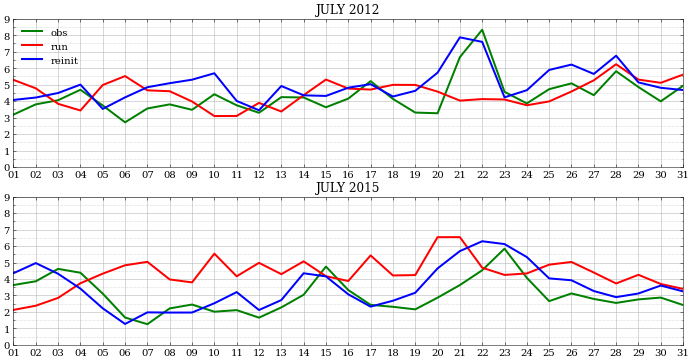

In [8]:
import matplotlib.dates as dates
import matplotlib.dates as dates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

plt.style.use(['science', 'no-latex']) # 采用 安装的scinence绘图风格，matplotlib风格拓展
fig, axs = plt.subplots(2,1,figsize=(16,12))
# pd_plot = pd.concat([df_obs, df_mod,minus], axis=1)
# plt.figure(figsize=(6,6))

ymin = 0.
ymax = 9.
idx = pd_plot_2012.index
# s = pd.Series(np.random.randn(len(idx)), index=idx)

# fig, ax = plt.subplots()
# ax.plot_date(idx.to_pydatetime(), 'v-')
# axs[0] = pd_plot_2012.plot(figsize=(12,6),style=['-','-','-'],linewidth=2)
# axs[1] = pd_plot_2015.plot(figsize=(12,6),style=['-','-','-'],linewidth=2)
# ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0),
#
#                                                 interval=1))
pd_plot = [pd_plot_2012, pd_plot_2015]
title = ['JULY 2012', 'JULY 2015']
for i,axs_ind in enumerate(axs):
    axs_ind = pd_plot[i].plot(figsize=(12,6),style=['-','-','-'],linewidth=2,ax=axs_ind,\
    color = ['g','r','b'])
    axs_ind.xaxis.grid(True, which="minor")
    axs_ind.yaxis.grid()

    axs_ind.xaxis.set_major_locator(dates.DayLocator())
    axs_ind.xaxis.set_major_formatter(dates.DateFormatter('%d'))
    axs_ind.xaxis.set_minor_locator(dates.DayLocator(interval=2))

    axs_ind.yaxis.set_major_locator(MultipleLocator(1.))
    axs_ind.yaxis.set_major_formatter(FormatStrFormatter('%1.f'))
    axs_ind.yaxis.set_minor_locator(MultipleLocator(0.5))

    axs_ind.xaxis.grid(True, which="minor", linestyle = ":")
    axs_ind.xaxis.grid(True, which="major", linestyle = "-")
    axs_ind.yaxis.grid(True, which="minor", linestyle = ":")
    axs_ind.yaxis.grid(True, which="major", linestyle = "-")
    # ax.set_xlim([xmin,xmax])
    axs_ind.set_ylim([ymin,ymax])
    axs_ind.set_title(title[i])
    axs_ind.get_legend().remove()
axs[0].legend(['obs','run','reinit'])
# plt.tight_layout()
# plt.show()
# ax.set_ylabel("total daily error /mm")
# plt.title("JULY 2012")
fig.patch.set_facecolor('white')
plt.savefig("./output_pic/pre_ts.png", dpi = 300, )